# Kepler űrtávcső - Gépi tanulás

A füzetben egy - a Kepler űrtvácső méréseiből előállított - adahalmazt fogok használni, és a csillagok egyessével való átnézését megpróbálom felváltani klasszikus gépi tanulási megközelítésekkel. Ilyen módon több ezer adatot át tudunk vizsgálni pár perc alatt.

## Csomagok importálása

In [ ]:
# Csomagok
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn Csomagok
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Sklearn Kiértékelési Metrikák
from sklearn import metrics
from sklearn.metrics import mean_squared_error, precision_score, confusion_matrix, accuracy_score


# Oszlopok Vizualizációja
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

## Az adatbázis

Vizsgáljunk meg egy adathalmazt és végezzünk el rajta gépi tanulást. Az adathalmazt a California Institute of Technology egyetem készítette a Kepler űrtávcső méréseiből.  

Az adathalmaz megtalálható a NASA exobolygó archívumában: https://exoplanetarchive.ipac.caltech.edu/

In [ ]:
# Adathalmaz importálása
df = pd.read_csv('exoplanets3_kepler.csv')

print(df.shape)

df.drop(columns=df.columns[0], axis=1, inplace=True)

df.head()

(9564, 83)


,kepid,kepoi_name,kepler_name,koi_disposition,koi_vet_stat,koi_vet_date,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_disp_prov,koi_comment,koi_period,koi_time0bk,koi_time0,koi_eccen,koi_longp,koi_impact,koi_duration,koi_ingress,koi_depth,koi_ror,koi_srho,koi_fittype,koi_prad,koi_sma,koi_incl,koi_teq,koi_insol,koi_dor,koi_limbdark_mod,koi_ldm_coeff4,koi_ldm_coeff3,koi_ldm_coeff2,koi_ldm_coeff1,koi_parm_prov,koi_max_sngle_ev,koi_max_mult_ev,koi_model_snr,koi_count,koi_num_transits,koi_tce_plnt_num,koi_tce_delivname,koi_quarters,koi_bin_oedp_sig,koi_trans_mod,koi_model_dof,koi_model_chisq,koi_datalink_dvr,koi_datalink_dvs,koi_steff,koi_slogg,koi_smet,koi_srad,koi_smass,koi_sage,koi_sparprov,ra,dec,koi_kepmag,koi_gmag,koi_rmag,koi_imag,koi_zmag,koi_jmag,koi_hmag,koi_kmag,koi_fwm_stat_sig,koi_fwm_sra,koi_fwm_sdec,koi_fwm_srao,koi_fwm_sdeco,koi_fwm_prao,koi_fwm_pdeco,koi_dicco_mra,koi_dicco_mdec,koi_dicco_msky,koi_dikco_mra,koi_dikco_mdec,koi_dikco_msky
0,10797460,K00752.01,Kepler-227 b,CONFIRMED,Done,2018-08-16,CANDIDATE,1.000,0,0,0,0,q1_q17_dr25_sup_koi,NO_COMMENT,9.488036,170.538750,2455003.539,0.0,NaN,0.146,2.95750,NaN,615.8,0.022344,3.20796,LS+MCMC,2.26,0.0853,89.66,793.0,93.59,24.810,Claret (2011 A&A 529 75) ATLAS LS,0.0,0.0,0.2291,0.4603,q1_q17_dr25_koi,5.135849,28.470820,35.8,2,142.0,1.0,q1_q17_dr25_tce,"1,11111111111111E+031",0.6864,Mandel and Agol (2002 ApJ 580 171),NaN,NaN,010/010797/010797460/dv/kplr010797460-20160209...,010/010797/010797460/dv/kplr010797460-001-2016...,5455.0,4.467,0.14,0.927,0.919,NaN,q1_q17_dr25_stellar,291.93423,48.141651,15.347,15.890,15.270,15.114,15.006,14.082,13.751,13.648,0.002,19.462294,48.14191,0.430,0.940,-0.00020,-0.00055,-0.010,0.200,0.200,0.080,0.310,0.320
1,10797460,K00752.02,Kepler-227 c,CONFIRMED,Done,2018-08-16,CANDIDATE,0.969,0,0,0,0,q1_q17_dr25_sup_koi,NO_COMMENT,54.418383,162.513840,2454995.514,0.0,NaN,0.586,4.50700,NaN,874.8,0.027954,3.02368,LS+MCMC,2.83,0.2734,89.57,443.0,9.11,77.900,Claret (2011 A&A 529 75) ATLAS LS,0.0,0.0,0.2291,0.4603,q1_q17_dr25_koi,7.027669,20.109507,25.8,2,25.0,2.0,q1_q17_dr25_tce,"1,11111111111111E+031",0.0023,Mandel and Agol (2002 ApJ 580 171),NaN,NaN,010/010797/010797460/dv/kplr010797460-20160209...,010/010797/010797460/dv/kplr010797460-002-2016...,5455.0,4.467,0.14,0.927,0.919,NaN,q1_q17_dr25_stellar,291.93423,48.141651,15.347,15.890,15.270,15.114,15.006,14.082,13.751,13.648,0.003,19.462265,48.14199,-0.630,1.230,0.00066,-0.00105,0.390,0.000,0.390,0.490,0.120,0.500
2,10811496,K00753.01,NaN,CANDIDATE,Done,2018-08-16,CANDIDATE,0.000,0,0,0,0,q1_q17_dr25_sup_koi,DEEP_V_SHAPED,19.899140,175.850252,2455008.850,0.0,NaN,0.969,1.78220,NaN,10829.0,0.154046,7.29555,LS+MCMC,14.60,0.1419,88.96,638.0,39.30,53.500,Claret (2011 A&A 529 75) ATLAS LS,0.0,0.0,0.2711,0.3858,q1_q17_dr25_koi,37.159767,187.449100,76.3,1,56.0,1.0,q1_q17_dr25_tce,"1,1111101110111E+031",0.6624,Mandel and Agol (2002 ApJ 580 171),NaN,NaN,010/010811/010811496/dv/kplr010811496-20160209...,010/010811/010811496/dv/kplr010811496-001-2016...,5853.0,4.544,-0.18,0.868,0.961,NaN,q1_q17_dr25_stellar,297.00482,48.134129,15.436,15.943,15.390,15.220,15.166,14.254,13.900,13.826,0.278,19.800321,48.13412,-0.021,-0.038,0.00070,0.00060,-0.025,-0.034,0.042,0.002,-0.027,0.027
3,10848459,K00754.01,NaN,FALSE POSITIVE,Done,2018-08-16,FALSE POSITIVE,0.000,0,1,0,0,q1_q17_dr25_sup_koi,MOD_ODDEVEN_DV---MOD_ODDEVEN_ALT---DEEP_V_SHAPED,1.736952,170.307565,2455003.308,0.0,NaN,1.276,2.40641,NaN,8079.2,0.387394,0.22080,LS+MCMC,33.46,0.0267,67.09,1395.0,891.96,3.278,Claret (2011 A&A 529 75) ATLAS LS,0.0,0.0,0.2865,0.3556,q1_q17_dr25_koi,39.066550,541.895100,505.6,1,621.0,1.0,q1_q17_dr25_tce,"1,11111101110111E+031",0.0000,Mandel and Agol (2002 ApJ 580 171),NaN,NaN,010/010848/010848459/dv/kplr010848459-20160209...,010/010848/010848459/dv/kplr010848459-001-2016...,5805.0,4.564,-0.52,0.791,0.836,NaN,q1_q17_dr25_stellar,285.53461,48.285210,15.597,16.100,15.554,15.382,15.266,14.326,13.911,13.809

Nézzük meg, hogy az adathalmaz milyen típusú adatokat tartalmaz!

In [ ]:
# Az adatok típusa
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 82 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   kepid              9564 non-null   int64  
 1   kepoi_name         9564 non-null   object 
 2   kepler_name        2743 non-null   object 
 3   koi_disposition    9564 non-null   object 
 4   koi_vet_stat       9564 non-null   object 
 5   koi_vet_date       9564 non-null   object 
 6   koi_pdisposition   9564 non-null   object 
 7   koi_score          8054 non-null   float64
 8   koi_fpflag_nt      9564 non-null   int64  
 9   koi_fpflag_ss      9564 non-null   int64  
 10  koi_fpflag_co      9564 non-null   int64  
 11  koi_fpflag_ec      9564 non-null   int64  
 12  koi_disp_prov      9564 non-null   object 
 13  koi_comment        8355 non-null   object 
 14  koi_period         9564 non-null   float64
 15  koi_time0bk        9564 non-null   float64
 16  koi_time0          9564 

Az egyes oszlopokat nevezzük át a Caltech oldalán szereplő oszlopnevek szerint a könnyebb átláthatóság kedvéért.

In [ ]:
df = df.rename(columns={'kepid':'KepID',
'kepoi_name':'KOIName',
'kepler_name':'KeplerName',
'koi_disposition':'ExoplanetArchiveDisposition',
'koi_pdisposition':'DispositionUsingKeplerData',
'koi_score':'DispositionScore',
'koi_fpflag_nt':'NotTransit-LikeFalsePositiveFlag',
'koi_fpflag_ss':'koi_fpflag_ss',
'koi_fpflag_co':'CentroidOffsetFalsePositiveFlag',
'koi_fpflag_ec':'EphemerisMatchIndicatesContaminationFalsePositiveFlag',
'koi_period':'OrbitalPeriod(days)',
'koi_period_err1':'OrbitalPeriodUpperUnc.(days)',
'koi_period_err2':'OrbitalPeriodLowerUnc.(days)',
'koi_time0bk':'TransitEpoch(BKJD)',
'koi_time0bk_err1':'TransitEpochUpperUnc.(BKJD)',
'koi_time0bk_err2':'TransitEpochLowerUnc.(BKJD)',
'koi_impact':'ImpactParamete',
'koi_impact_err1':'ImpactParameterUpperUnc',
'koi_impact_err2':'ImpactParameterLowerUnc',
'koi_duration':'TransitDuration(hrs)',
'koi_duration_err1':'TransitDurationUpperUnc.(hrs)',
'koi_duration_err2':'TransitDurationLowerUnc.(hrs)',
'koi_depth':'TransitDepth(ppm)',
'koi_depth_err1':'TransitDepthUpperUnc.(ppm)',
'koi_depth_err2':'TransitDepthLowerUnc.(ppm)',
'koi_prad':'PlanetaryRadiusEarthradii',
'koi_prad_err1':'PlanetaryRadiusUpperUnc.(Earthradii)',
'koi_prad_err2':'PlanetaryRadiusLowerUnc.(Earthradii)',
'koi_teq':'EquilibriumTemperature(K)',
'koi_teq_err1':'EquilibriumTemperatureUpperUnc.(K)',
'koi_teq_err2':'EquilibriumTemperatureLowerUnc.(K)',
'koi_insol':'InsolationFlux(Earthflux)',
'koi_insol_err1':'InsolationFluxUpperUnc.(Earthflux)',
'koi_insol_err2':'InsolationFluxLowerUnc.(Earthflux)',
'koi_model_snr':'TransitSignal-to-Nois',
'koi_tce_plnt_num':'TCEPlanetNumbe',
'koi_tce_delivname':'TCEDeliver',
'koi_steff':'StellarEffectiveTemperature(K)',
'koi_steff_err1':'StellarEffectiveTemperatureUpperUnc.(K)',
'koi_steff_err2':'StellarEffectiveTemperatureLowerUnc.(K)',
'koi_slogg':'StellarSurfaceGravity(log10(cm/s**2))',
'koi_slogg_err1':'StellarSurfaceGravityUpperUnc.(log10(cm/s**2))',
'koi_slogg_err2':'StellarSurfaceGravityLowerUnc.(log10(cm/s**2))',
'koi_srad':'StellarRadius(Solarradii)',
'koi_srad_err1':'StellarRadiusUpperUnc.(Solarradii)',
'koi_srad_err2':'StellarRadiusLowerUnc.(Solarradii)',
'ra':'RA(decimaldegrees)',
'dec':'Dec(decimaldegrees)',
'koi_kepmag':'Kepler-band(mag)'
})
df.head()

,KepID,KOIName,KeplerName,ExoplanetArchiveDisposition,koi_vet_stat,koi_vet_date,DispositionUsingKeplerData,DispositionScore,NotTransit-LikeFalsePositiveFlag,koi_fpflag_ss,CentroidOffsetFalsePositiveFlag,EphemerisMatchIndicatesContaminationFalsePositiveFlag,koi_disp_prov,koi_comment,OrbitalPeriod(days),TransitEpoch(BKJD),koi_time0,koi_eccen,koi_longp,ImpactParamete,TransitDuration(hrs),koi_ingress,TransitDepth(ppm),koi_ror,koi_srho,koi_fittype,PlanetaryRadiusEarthradii,koi_sma,koi_incl,EquilibriumTemperature(K),InsolationFlux(Earthflux),koi_dor,koi_limbdark_mod,koi_ldm_coeff4,koi_ldm_coeff3,koi_ldm_coeff2,koi_ldm_coeff1,koi_parm_prov,koi_max_sngle_ev,koi_max_mult_ev,TransitSignal-to-Nois,koi_count,koi_num_transits,TCEPlanetNumbe,TCEDeliver,koi_quarters,koi_bin_oedp_sig,koi_trans_mod,koi_model_dof,koi_model_chisq,koi_datalink_dvr,koi_datalink_dvs,StellarEffectiveTemperature(K),StellarSurfaceGravity(log10(cm/s**2)),koi_smet,StellarRadius(Solarradii),koi_smass,koi_sage,koi_sparprov,RA(decimaldegrees),Dec(decimaldegrees),Kepler-band(mag),koi_gmag,koi_rmag,koi_imag,koi_zmag,koi_jmag,koi_hmag,koi_kmag,koi_fwm_stat_sig,koi_fwm_sra,koi_fwm_sdec,koi_fwm_srao,koi_fwm_sdeco,koi_fwm_prao,koi_fwm_pdeco,koi_dicco_mra,koi_dicco_mdec,koi_dicco_msky,koi_dikco_mra,koi_dikco_mdec,koi_dikco_msky
0,10797460,K00752.01,Kepler-227 b,CONFIRMED,Done,2018-08-16,CANDIDATE,1.000,0,0,0,0,q1_q17_dr25_sup_koi,NO_COMMENT,9.488036,170.538750,2455003.539,0.0,NaN,0.146,2.95750,NaN,615.8,0.022344,3.20796,LS+MCMC,2.26,0.0853,89.66,793.0,93.59,24.810,Claret (2011 A&A 529 75) ATLAS LS,0.0,0.0,0.2291,0.4603,q1_q17_dr25_koi,5.135849,28.470820,35.8,2,142.0,1.0,q1_q17_dr25_tce,"1,11111111111111E+031",0.6864,Mandel and Agol (2002 ApJ 580 171),NaN,NaN,010/010797/010797460/dv/kplr010797460-20160209...,010/010797/010797460/dv/kplr010797460-001-2016...,5455.0,4.467,0.14,0.927,0.919,NaN,q1_q17_dr25_stellar,291.93423,48.141651,15.347,15.890,15.270,15.114,15.006,14.082,13.751,13.648,0.002,19.462294,48.14191,0.430,0.940,-0.00020,-0.00055,-0.010,0.200,0.200,0.080,0.310,0.320
1,10797460,K00752.02,Kepler-227 c,CONFIRMED,Done,2018-08-16,CANDIDATE,0.969,0,0,0,0,q1_q17_dr25_sup_koi,NO_COMMENT,54.418383,162.513840,2454995.514,0.0,NaN,0.586,4.50700,NaN,874.8,0.027954,3.02368,LS+MCMC,2.83,0.2734,89.57,443.0,9.11,77.900,Claret (2011 A&A 529 75) ATLAS LS,0.0,0.0,0.2291,0.4603,q1_q17_dr25_koi,7.027669,20.109507,25.8,2,25.0,2.0,q1_q17_dr25_tce,"1,11111111111111E+031",0.0023,Mandel and Agol (2002 ApJ 580 171),NaN,NaN,010/010797/010797460/dv/kplr010797460-20160209...,010/010797/010797460/dv/kplr010797460-002-2016...,5455.0,4.467,0.14,0.927,0.919,NaN,q1_q17_dr25_stellar,291.93423,48.141651,15.347,15.890,15.270,15.114,15.006,14.082,13.751,13.648,0.003,19.462265,48.14199,-0.630,1.230,0.00066,-0.00105,0.390,0.000,0.390,0.490,0.120,0.500
2,10811496,K00753.01,NaN,CANDIDATE,Done,2018-08-16,CANDIDATE,0.000,0,0,0,0,q1_q17_dr25_sup_koi,DEEP_V_SHAPED,19.899140,175.850252,2455008.850,0.0,NaN,0.969,1.78220,NaN,10829.0,0.154046,7.29555,LS+MCMC,14.60,0.1419,88.96,638.0,39.30,53.500,Claret (2011 A&A 529 75) ATLAS LS,0.0,0.0,0.2711,0.3858,q1_q17_dr25_koi,37.159767,187.449100,76.3,1,56.0,1.0,q1_q17_dr25_tce,"1,1111101110111E+031",0.6624,Mandel and Agol (2002 ApJ 580 171),NaN,NaN,010/010811/010811496/dv/kplr010811496-20160209...,010/010811/010811496/dv/kplr010811496-001-2016...,5853.0,4.544,-0.18,0.868,0.961,NaN,q1_q17_dr25_stellar,297.00482,48.134129,15.436,15.943,15.390,15.220,15.166,14.254,13.900,13.826,0.278,19.800321,48.13412,-0.021,-0.038,0.00070,0.00060,-0.025,-0.034,0.042,0.002,-0.027,0.027
3,10848459,K00754.01,NaN,FALSE POSITIVE,Done,2018-08-16,FALSE POSITIVE,0.000,0,1,0,0,q1_q17_dr25_sup_koi,MOD_ODDEVEN_DV---MOD_ODDEVEN_ALT---DEEP_V_SHAPED,1.736952,170.307565,2455003.308,0.0,NaN,1.276,2.40641,NaN,8079.2,0.387394,0.22080,LS+MCMC,33.46,0.0267,67.09,1395.0,891.96,3.278,Claret (2011 A&A 529 75) ATLAS LS,0.0,0.0,0.2865,0.3556,q1_q17_dr25_koi,39.066550,541.895100,505.6,1,621.0,1.0,q1_q17_dr25_tce,"1,111111011

In [ ]:
df = df[df['ExoplanetArchiveDisposition'] != 'CANDIDATE']

In [ ]:
df['ExoplanetCandidate'] = df['DispositionUsingKeplerData'].apply(lambda x: 1 if x == 'CANDIDATE' else 0)

In [ ]:
df['ExoplanetConfirmed'] = df['ExoplanetArchiveDisposition'].apply(lambda x: 2 if x == 'CONFIRMED' else 1 if x == 'CANDIDATE' else 0 )

In [ ]:
df.head()

,KepID,KOIName,KeplerName,ExoplanetArchiveDisposition,koi_vet_stat,koi_vet_date,DispositionUsingKeplerData,DispositionScore,NotTransit-LikeFalsePositiveFlag,koi_fpflag_ss,CentroidOffsetFalsePositiveFlag,EphemerisMatchIndicatesContaminationFalsePositiveFlag,koi_disp_prov,koi_comment,OrbitalPeriod(days),TransitEpoch(BKJD),koi_time0,koi_eccen,koi_longp,ImpactParamete,TransitDuration(hrs),koi_ingress,TransitDepth(ppm),koi_ror,koi_srho,koi_fittype,PlanetaryRadiusEarthradii,koi_sma,koi_incl,EquilibriumTemperature(K),InsolationFlux(Earthflux),koi_dor,koi_limbdark_mod,koi_ldm_coeff4,koi_ldm_coeff3,koi_ldm_coeff2,koi_ldm_coeff1,koi_parm_prov,koi_max_sngle_ev,koi_max_mult_ev,TransitSignal-to-Nois,koi_count,koi_num_transits,TCEPlanetNumbe,TCEDeliver,koi_quarters,koi_bin_oedp_sig,koi_trans_mod,koi_model_dof,koi_model_chisq,koi_datalink_dvr,koi_datalink_dvs,StellarEffectiveTemperature(K),StellarSurfaceGravity(log10(cm/s**2)),koi_smet,StellarRadius(Solarradii),koi_smass,koi_sage,koi_sparprov,RA(decimaldegrees),Dec(decimaldegrees),Kepler-band(mag),koi_gmag,koi_rmag,koi_imag,koi_zmag,koi_jmag,koi_hmag,koi_kmag,koi_fwm_stat_sig,koi_fwm_sra,koi_fwm_sdec,koi_fwm_srao,koi_fwm_sdeco,koi_fwm_prao,koi_fwm_pdeco,koi_dicco_mra,koi_dicco_mdec,koi_dicco_msky,koi_dikco_mra,koi_dikco_mdec,koi_dikco_msky,ExoplanetCandidate,ExoplanetConfirmed
0,10797460,K00752.01,Kepler-227 b,CONFIRMED,Done,2018-08-16,CANDIDATE,1.000,0,0,0,0,q1_q17_dr25_sup_koi,NO_COMMENT,9.488036,170.538750,2455003.539,0.0,NaN,0.146,2.95750,NaN,615.8,0.022344,3.20796,LS+MCMC,2.26,0.0853,89.66,793.0,93.59,24.810,Claret (2011 A&A 529 75) ATLAS LS,0.0,0.0,0.2291,0.4603,q1_q17_dr25_koi,5.135849,28.470820,35.8,2,142.0,1.0,q1_q17_dr25_tce,"1,11111111111111E+031",0.6864,Mandel and Agol (2002 ApJ 580 171),NaN,NaN,010/010797/010797460/dv/kplr010797460-20160209...,010/010797/010797460/dv/kplr010797460-001-2016...,5455.0,4.467,0.14,0.927,0.919,NaN,q1_q17_dr25_stellar,291.93423,48.141651,15.347,15.890,15.270,15.114,15.006,14.082,13.751,13.648,0.002,19.462294,48.14191,0.430,0.940,-0.00020,-0.00055,-0.010,0.200,0.200,0.080,0.310,0.320,1,2
1,10797460,K00752.02,Kepler-227 c,CONFIRMED,Done,2018-08-16,CANDIDATE,0.969,0,0,0,0,q1_q17_dr25_sup_koi,NO_COMMENT,54.418383,162.513840,2454995.514,0.0,NaN,0.586,4.50700,NaN,874.8,0.027954,3.02368,LS+MCMC,2.83,0.2734,89.57,443.0,9.11,77.900,Claret (2011 A&A 529 75) ATLAS LS,0.0,0.0,0.2291,0.4603,q1_q17_dr25_koi,7.027669,20.109507,25.8,2,25.0,2.0,q1_q17_dr25_tce,"1,11111111111111E+031",0.0023,Mandel and Agol (2002 ApJ 580 171),NaN,NaN,010/010797/010797460/dv/kplr010797460-20160209...,010/010797/010797460/dv/kplr010797460-002-2016...,5455.0,4.467,0.14,0.927,0.919,NaN,q1_q17_dr25_stellar,291.93423,48.141651,15.347,15.890,15.270,15.114,15.006,14.082,13.751,13.648,0.003,19.462265,48.14199,-0.630,1.230,0.00066,-0.00105,0.390,0.000,0.390,0.490,0.120,0.500,1,2
3,10848459,K00754.01,NaN,FALSE POSITIVE,Done,2018-08-16,FALSE POSITIVE,0.000,0,1,0,0,q1_q17_dr25_sup_koi,MOD_ODDEVEN_DV---MOD_ODDEVEN_ALT---DEEP_V_SHAPED,1.736952,170.307565,2455003.308,0.0,NaN,1.276,2.40641,NaN,8079.2,0.387394,0.22080,LS+MCMC,33.46,0.0267,67.09,1395.0,891.96,3.278,Claret (2011 A&A 529 75) ATLAS LS,0.0,0.0,0.2865,0.3556,q1_q17_dr25_koi,39.066550,541.895100,505.6,1,621.0,1.0,q1_q17_dr25_tce,"1,11111101110111E+031",0.0000,Mandel and Agol (2002 ApJ 580 171),NaN,NaN,010/010848/010848459/dv/kplr010848459-20160209...,010/010848/010848459/dv/kplr010848459-001-2016...,5805.0,4.564,-0.52,0.791,0.836,NaN,q1_q17_dr25_stellar,285.53461,48.285210,15.597,16.100,15.554,15.382,15.266,14.326,13.911,13.809,0.000,19.035638,48.28521,-0.111,0.002,0.00302,-0.00142,-0.249,0.147,0.289,-0.257,0.099,0.276,0,0
4,10854555,K00755.01,Kepler-664 b,CONFIRMED,Done,2018-08-16,CANDIDATE,1.000,0,0,0,0,q1_q17_dr25_sup_koi,NO_COMMENT,2.525592,171.595550,2455004.596,0.0,NaN,0.701,1.65450,NaN,603.3,0.024064,1.98635,LS+MCMC,2.75,0.0374,85.41,1406.0,926.16,8.750,Claret (2011 A&A 529 75) ATLAS LS,0.0,0.0,0.2844,0.3661,q1_q17_dr25_koi,4.749945,33.

### Adathalmaz megtisztítása

In [ ]:
df.drop(columns=['KeplerName','KOIName',
                 'KepID','ExoplanetArchiveDisposition','DispositionUsingKeplerData',
                 'NotTransit-LikeFalsePositiveFlag','koi_fpflag_ss','CentroidOffsetFalsePositiveFlag', 'koi_longp', 'koi_ingress',
                 'EphemerisMatchIndicatesContaminationFalsePositiveFlag','TCEDeliver', 'koi_sage', 'koi_model_dof',	'koi_model_chisq'
                 ], inplace=True)

In [ ]:
df.shape

(7580, 69)

In [ ]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame)
    df.dropna(inplace=True) # A null értékeket tartalmazó sorokat töröljük.
    df = df.select_dtypes(include=[np.number])  # Kizárólag a számértékeket tartjuk meg.
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(axis=1)
    return df[indices_to_keep].astype(np.float64)

clean_dataset(df)

In [ ]:
df = clean_dataset(df)

In [ ]:
df.shape

(5426, 57)

Az osztályok eloszlásának vizsgálata. Egy erőssen kiegyensúlyozatlan adathalmaz komoly problémákat idézhet elő, azonban szerencsére ebben az esetben egy kellően kiegyensúlyozott adathalmazzal dolgozunk.

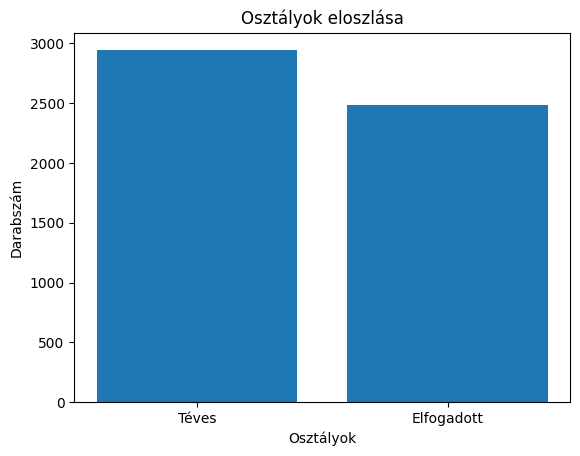

Osztályok eloszlása:
ExoplanetCandidate
0.0    2942
1.0    2484
Name: count, dtype: int64


In [ ]:
import matplotlib.pyplot as plt

target_column = 'ExoplanetCandidate'

class_distribution = df[target_column].value_counts()

# Rajzoljuk ki az osztályok eloszlását oszlop diagrammal
plt.bar(class_distribution.index, class_distribution.values)
plt.xlabel('Osztályok')
plt.ylabel('Darabszám')
plt.xticks(class_distribution.index, ['Téves', 'Elfogadott'])
plt.title('Osztályok eloszlása')
plt.show()

# Írassuk is ki az osztályok eloszlását
print('Osztályok eloszlása:')
print(class_distribution)

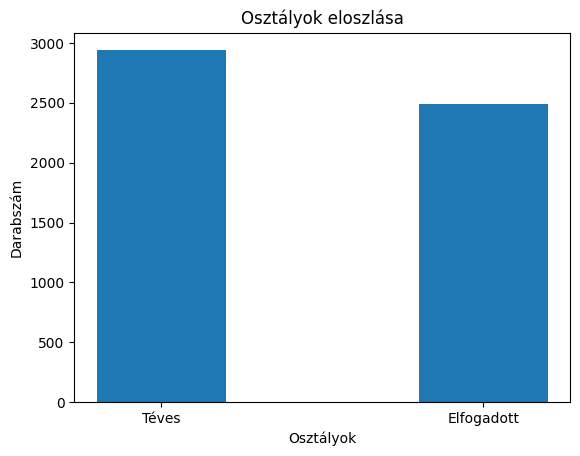

Osztályok eloszlása:
ExoplanetConfirmed
0.0    2938
2.0    2488
Name: count, dtype: int64


In [ ]:
import matplotlib.pyplot as plt

target_column = 'ExoplanetConfirmed'

class_distribution = df[target_column].value_counts()

# Rajzoljuk ki az osztályok eloszlását oszlop diagrammal
plt.bar(class_distribution.index, class_distribution.values)
plt.xlabel('Osztályok')
plt.ylabel('Darabszám')
plt.xticks(class_distribution.index, ['Téves', 'Elfogadott'])
plt.title('Osztályok eloszlása')
plt.show()

# Írassuk is ki az osztályok eloszlását
print('Osztályok eloszlása:')
print(class_distribution)

## Kiértékelés

In [ ]:
# Kiértékelés
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_xlabel('Predikált címkék')
    ax.set_ylabel('True címkék')
    ax.set_title('Tévesztési Mátrix')
    ax.xaxis.set_ticklabels(['Negatív', 'Pozitív'])
    ax.yaxis.set_ticklabels(['Negatív', 'Pozitív'])
    plt.show()

def evaluation(y_true, y_pred):
    # Accuracy, Recall, F1 Score, Precision metrikák.
    print('Kiértékelés:')
    print('Accuracy: ' + str(metrics.accuracy_score(y_test, y_pred)))
    print('Recall: ' + str(metrics.recall_score(y_test, y_pred)))
    print('F1 Score: ' + str(metrics.f1_score(y_test, y_pred)))
    print('Precision: ' + str(metrics.precision_score(y_test, y_pred)))

    # Tévesztési mátrix
    plot_confusion_matrix(y_true, y_pred)



# A GridSearchCV legjobb paraméterei
def print_results(results):
    print('Best Parameters: {}\n'.format(results.best_params_))



In [ ]:
features = df.drop(columns=['ExoplanetCandidate','ExoplanetConfirmed'])
target = df.ExoplanetCandidate
#target = df.ExoplanetConfirmed

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=1, test_size=.40) # válasszuk szét az adathalmazunkat tanító és kiértékelő részekre

In [ ]:
# Ellenőrízzük le, hogy helyes volt-e a szétválasztásunk.
for dataset in [y_train, y_test]:
    print(round(len(dataset)/len(target), 2))

0.6
0.4


## Modellek

Kiértékelés:
Accuracy: 0.7825886688162137
Recall: 0.9217046580773043
F1 Score: 0.7975986277873071
Precision: 0.7029478458049887


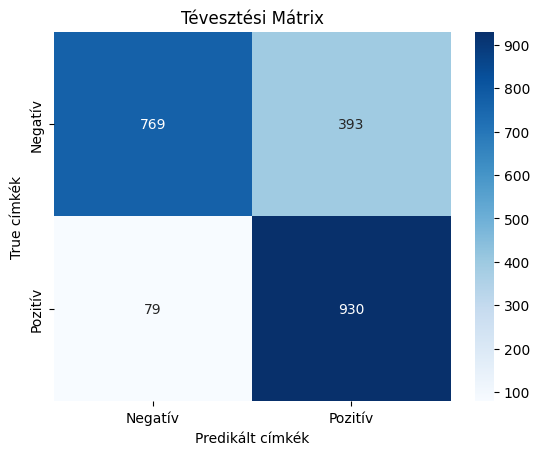

In [ ]:
# Logikai Regressziós Modell
lr = LogisticRegression(C=100, max_iter=200, class_weight='balanced')

# Illesszük a modellt a tanító halmazra
lr.fit(X_train, y_train)

# Predikció
y_pred = lr.predict(X_test)

# Modell kiértékelése
evaluation(y_test, y_pred)

Grid Search Eredményei:
Configuration: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
Accuracy: 0.7803379416282642

Configuration: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
Accuracy: 0.7781874039938557

Configuration: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
Accuracy: 0.7864823348694316

Configuration: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
Accuracy: 0.7855606758832565

Configuration: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}
Accuracy: 0.7904761904761904

Configuration: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}
Accuracy: 0.7904761904761906

Configuration: {'metric': 'euclidean', 'n_neighbors': 10, 'weights': 'uniform'}
Accuracy: 0.7944700460829492

Configuration: {'metric': 'euclidean', 'n_neighbors': 10, 'weights': 'distance'}
Accuracy: 0.7956989247311828

Configuration: {'metric': 'euclidean', 'n_neighbors': 12, 'weights': 'uniform'}
Accuracy: 0.793855

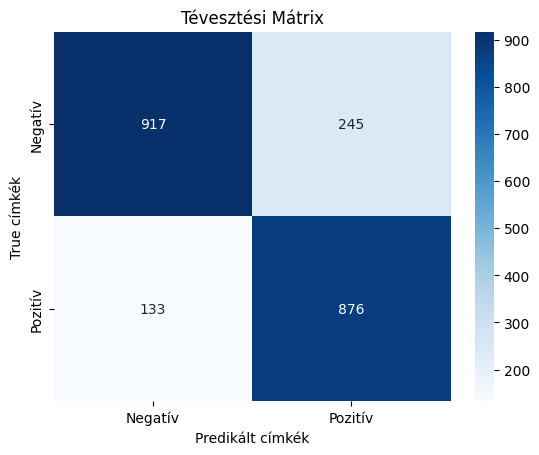

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# A grid search paraméterei
param_grid = {
    'n_neighbors': [3, 5, 7, 10, 12],
    'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski'],
    'weights': ['uniform', 'distance']
}

knn = KNeighborsClassifier()

grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

# Illesszük rá a grid modellt a tanító halmazra
grid_search.fit(X_train, y_train)

best_knn = grid_search.best_estimator_

# Írjuk ki a konfigurációkat és az accuracy-t
print("Grid Search Eredményei:")
for i in range(len(grid_search.cv_results_['params'])):
    print("Configuration:", grid_search.cv_results_['params'][i])
    print("Accuracy:", grid_search.cv_results_['mean_test_score'][i])
    print()

# Predikáljunk a teszthalmazon (a legjobb közelítéssel)
y_pred = best_knn.predict(X_test)

# Értékeljük ki a modellt
evaluation(y_test, y_pred)

Kiértékelés:
Accuracy: 0.9737448180561953
Recall: 0.9712586719524281
F1 Score: 0.9717402082300446
Precision: 0.9722222222222222


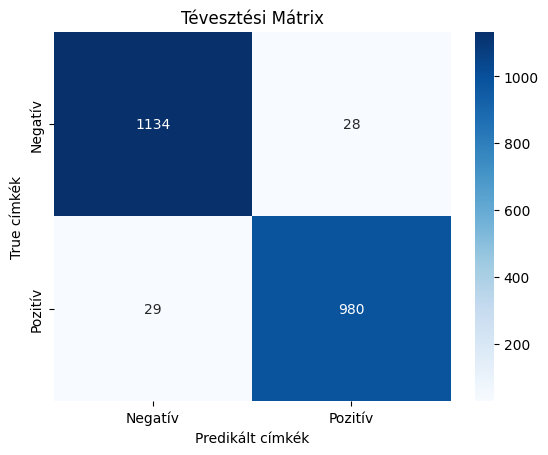

In [ ]:
tree = DecisionTreeClassifier()

# Illesszük rá a modellt a tanító halmazra
tree.fit(X_train, y_train)

# Predikáljunk a teszthalmazon
y_pred = tree.predict(X_test)

# Értékeljük ki a modellt
evaluation(y_test, y_pred)

Legjobb paraméterek: {'criterion': 'gini', 'max_depth': 9, 'n_estimators': 100, 'oob_score': True}
Kiértékelés:
Accuracy: 0.9847996315062183
Recall: 0.977205153617443
F1 Score: 0.9835411471321696
Precision: 0.9899598393574297


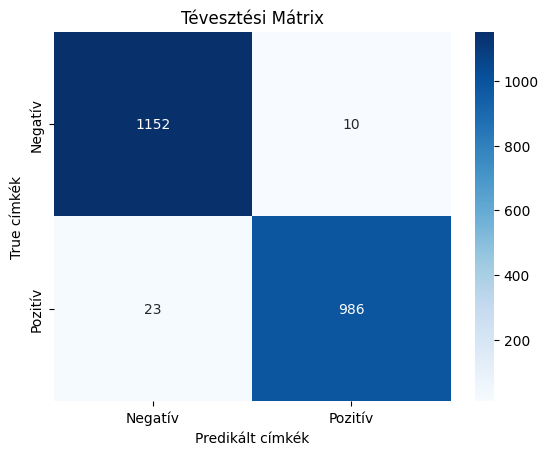

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

forest = RandomForestClassifier()

# A grid search paraméterei
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': list(range(1, 11)),
    'criterion':['gini','entropy'],
    'oob_score':[False,True],
}

grid_search = GridSearchCV(forest, param_grid, cv=5, scoring='accuracy')

# Illesszük rá a grid modellt a tanító halmazra
grid_search.fit(X_train, y_train)

best_forest = grid_search.best_estimator_

# Írassuk ki a legjobb paramétereket
print("Legjobb paraméterek:", grid_search.best_params_)

# Predikáljunk a teszthalmazon (a legjobb közelítéssel)
y_pred = best_forest.predict(X_test)

# Értékeljük ki a modellt
evaluation(y_test, y_pred)

Kiértékelés:
Accuracy: 0.9829571625978811
Recall: 0.9742319127849356
F1 Score: 0.9815277084373439
Precision: 0.9889336016096579


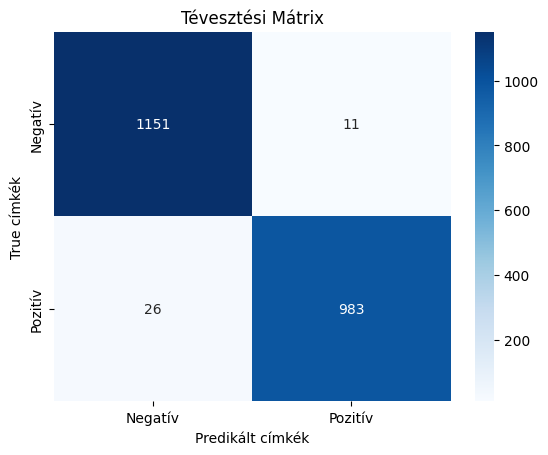

In [ ]:
forest = RandomForestClassifier(n_estimators=100, criterion='gini')

# Illesszük rá a modellt a tanító halmazra
forest.fit(X_train, y_train)

# Predikáljunk a teszthalmazon
y_pred = forest.predict(X_test)

# Értékeljük ki a modellt
evaluation(y_test, y_pred)

## Neurális háló

Az egyszerűbb osztályozók után egy egyszerű neurális hálót is kipróbálok..

Csomagok importálása


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
# Adatok standardizása
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Készítsük el a neurális hálót
model = Sequential()

# Bemeneti réteg
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
# A túltanulás érdekében vezessünk be egy Dropout réteget
model.add(Dropout(0.5))

# Rejtett rétegek
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

# Kimeneti réteg
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# A modell tanítása
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

# Végül értékeljük ki a teszt halmazon
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')

Epoch 1/10
92/92 [==============================] - 3s 10ms/step - loss: 0.3477 - accuracy: 0.8501 - val_loss: 0.0881 - val_accuracy: 0.9724
Epoch 2/10
92/92 [==============================] - 1s 10ms/step - loss: 0.1284 - accuracy: 0.9607 - val_loss: 0.0531 - val_accuracy: 0.9785
Epoch 3/10
92/92 [==============================] - 1s 10ms/step - loss: 0.0928 - accuracy: 0.9737 - val_loss: 0.0430 - val_accuracy: 0.9816
Epoch 4/10
92/92 [==============================] - 1s 12ms/step - loss: 0.0816 - accuracy: 0.9764 - val_loss: 0.0400 - val_accuracy: 0.9755
Epoch 5/10
92/92 [==============================] - 1s 5ms/step - loss: 0.0764 - accuracy: 0.9799 - val_loss: 0.0390 - val_accuracy: 0.9816
Epoch 6/10
92/92 [==============================] - 0s 5ms/step - loss: 0.0709 - accuracy: 0.9785 - val_loss: 0.0390 - val_accuracy: 0.9816
Epoch 7/10
92/92 [==============================] - 0s 4ms/step - loss: 0.0716 - accuracy: 0.9778 - val_loss: 0.0364 - val_accuracy: 0.9847
Epoch 8/10
92/92

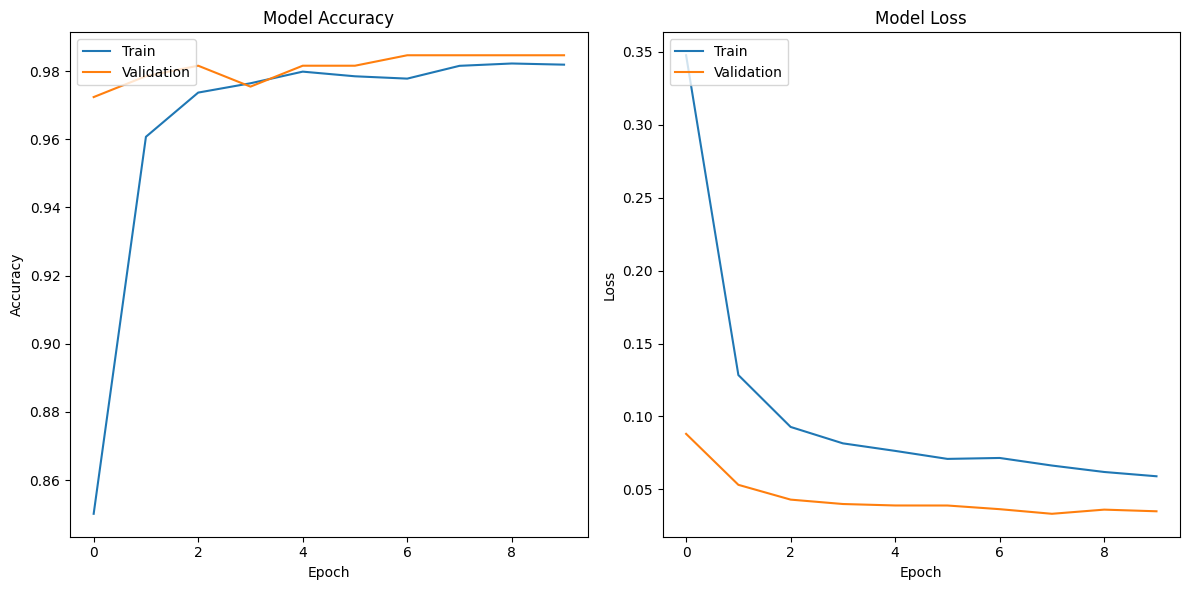

In [ ]:
# Rajzoljuk ki a training és validációs accuracyt és losst minden epoch után
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()